# В данной задаче мы будем использовать распределение [Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)
Во распределении в библиотеке SciPy значение xm сдвинуто на +1. Этому можно убедиться, построив график распределения плотности вероятности: несмотря на то, что xm присвоено значение 0, график начинается с единицы. (Соотнесите данные с информацией из википедии).
Функция плотности распределения: $$f_{X}(x)={\begin{cases}{\dfrac {kx_{m}^{k}}{x^{k+1}}},&x\geqslant x_{m},\\[1ex]0,&x<x_{m}.\end{cases}}$$

In [160]:
import numpy as np
from matplotlib import pylab as plt
from scipy import stats as sts
from math import sqrt

Зададим свободные параметры $k=3$ и $x_m=1$ (пишем 0 по причине описанной в шапке). Вычислим математическое ожидание и дисперсию распределения.
$${E}X={\frac {kx_{m}}{k-1}}$$
$$\mathrm {D}X=\left({\frac {x_{m}}{k-1}}\right)^{2}{\frac {k}{k-2}}$$

In [161]:
k=float(3)
xm=float(0)
pareto_rv = sts.pareto(k, xm)
sample = pareto_rv.rvs(1000)
pareto_dispersion = pow((xm+1)/(k-1), 2)*(k/(k-2))
pareto_expected_value = k*(xm+1)/(k-1)

In [162]:
x = np.linspace(0.0, 7.0, num=1000)
y = pareto_rv.pdf(x)

### Построим гистограмму распределения по 1000 значениям и сравним с теоретическим ожиданием

Text(0, 0.5, 'Вероятность')

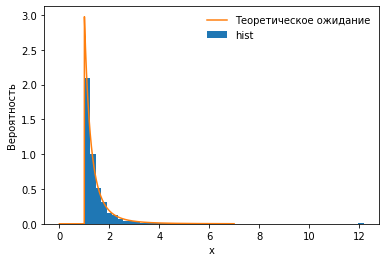

In [163]:
plt.hist(sample, bins=50, density = True, label='Г')
plt.plot(x,y, label='Теоретическое ожидание')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Вероятность')

Как мы видим, выборочная гистограмма хорошо соответсвует ожидаемому распределению

### Теперь построим распределение тысячи выборочных средних по выборке объема 5 и сравним с нормальным распределением.
В sts.norm распределение задается через $\mu$ и $\sigma$ поэтому мы считаем $\sqrt\frac{DX}{n}$, где n - размер выборки.

In [164]:
n=5
y = np.arange(1,1000, dtype=float)
kik = np.arange(1,1000, dtype=float)

for i in range(0, 999):
    sample = pareto_rv.rvs(n)
    y[i] = sample.mean()


Text(0, 0.5, 'Вероятность')

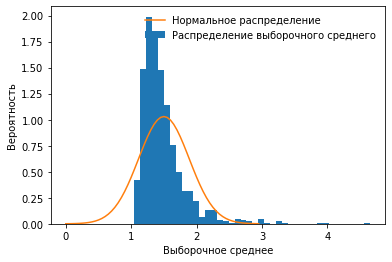

In [165]:
plt.hist(y[0:1000], 40, density = True, histtype='stepfilled', label = 'Распределение выборочного среднего')
plt.plot(np.arange(0, 3, 0.05), sts.norm.pdf(np.arange(0, 3, 0.05), pareto_expected_value, sqrt(pareto_dispersion/n)), label = 'Нормальное распределение')
plt.legend(loc='best', frameon=False)
plt.xlabel('Выборочное среднее')
plt.ylabel('Вероятность')

Как мы видим, нормальное распределение показывает неплохую корреляцию с распределением выборок 

### Проверим соответсвие распределений для объемов выборки n = 10, 50 и 5000.

In [166]:
n=10
y = np.arange(1,1000, dtype=float)
kik = np.arange(1,1000, dtype=float)

for i in range(0, 999):
    sample = pareto_rv.rvs(n)
    y[i] = sample.mean()


Text(0, 0.5, 'Вероятность')

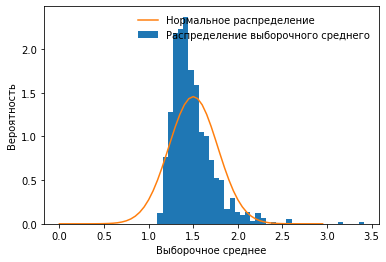

In [167]:
plt.hist(y[0:1000], 40, density = True, histtype='stepfilled', label = 'Распределение выборочного среднего')
plt.plot(np.arange(0,3, 0.05), sts.norm.pdf(np.arange(0, 3, 0.05), pareto_expected_value, sqrt(pareto_dispersion/n)), label = 'Нормальное распределение')
plt.legend(loc='best', frameon=False)
plt.xlabel('Выборочное среднее')
plt.ylabel('Вероятность')

In [168]:
n=50
y = np.arange(1,1000, dtype=float)
kik = np.arange(1,1000, dtype=float)

for i in range(0, 999):
    sample = pareto_rv.rvs(n)
    y[i] = sample.mean()


Text(0, 0.5, 'Вероятность')

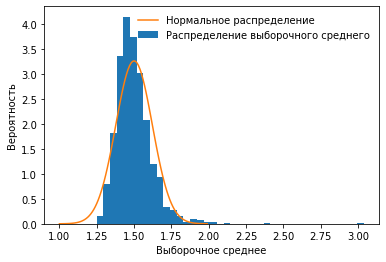

In [169]:
plt.hist(y[0:1000], 40, density = True, histtype='stepfilled', label = 'Распределение выборочного среднего')
plt.plot(np.arange(1,2, 0.01), sts.norm.pdf(np.arange(1, 2, 0.01), pareto_expected_value, sqrt(pareto_dispersion/n)), label = 'Нормальное распределение')
plt.legend(loc='best', frameon=False)
plt.xlabel('Выборочное среднее')
plt.ylabel('Вероятность')

In [170]:
n=5000
y = np.arange(1,1000, dtype=float)
kik = np.arange(1,1000, dtype=float)

for i in range(0, 999):
    sample = pareto_rv.rvs(n)
    y[i] = sample.mean()


Text(0, 0.5, 'Вероятность')

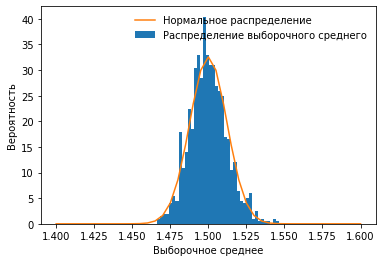

In [171]:
plt.hist(y[0:1000], 40, density = True, histtype='stepfilled', label = 'Распределение выборочного среднего')
plt.plot(np.arange(1.4,1.6, 0.005), sts.norm.pdf(np.arange(1.4,1.6, 0.005), pareto_expected_value, sqrt(pareto_dispersion/n)), label = 'Нормальное распределение')
plt.legend(loc='best', frameon=False)
plt.xlabel('Выборочное среднее')
plt.ylabel('Вероятность')

# Вывод
Распределение выборочных средних хорошо соотвествует нормальному распределению, что подтверждает действительность центральной предельной теоремы, причем с ростом объема выборки растет и соотвествие распределений.